In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df= pd.read_csv(r"https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv", na_values="na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [3]:
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [4]:
categorical_features=df.select_dtypes(include="object").columns
numerical_features=df.select_dtypes(exclude="object").columns

In [5]:
print(f"The total number of categorical features are {len(categorical_features)} and the features are {categorical_features.tolist()}")
print(f"The total number of categorical features are {len(numerical_features)} and the features are {numerical_features.tolist()}")

The total number of categorical features are 1 and the features are ['class']
The total number of categorical features are 170 and the features are ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz

In [6]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [7]:
df['class'].isnull().any()

False

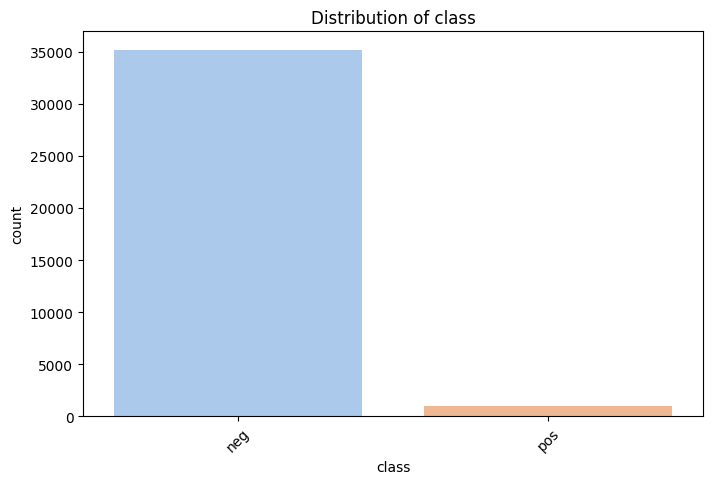

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['class'], palette='pastel', order=df['class'].value_counts().index)
plt.xlabel('class')
plt.ylabel('count')
plt.title('Distribution of class')
plt.xticks(rotation=45)
plt.show()


In [24]:
missing_percentage = ((df.isnull().sum())/len(df)*100).sort_values(ascending=False)

<Axes: >

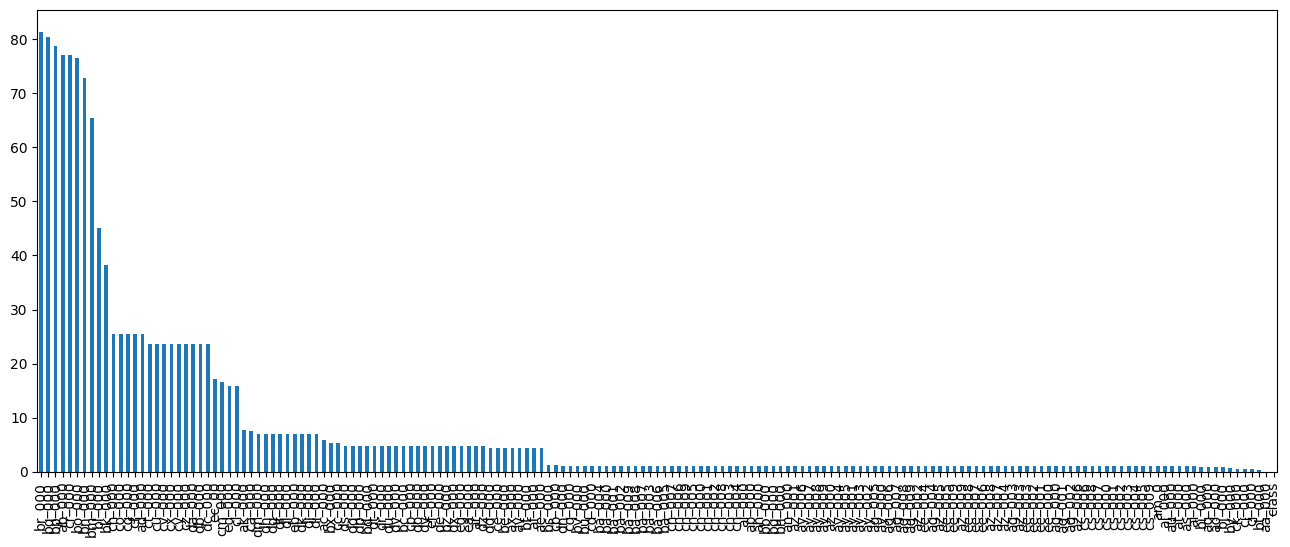

In [25]:
plt.figure(figsize=[16,6])
missing_percentage.plot(kind="bar")

In [43]:
df_drop = df[(missing_percentage[missing_percentage<=70].sort_values(ascending=False)).index]

In [44]:
df_drop

,bm_000,bl_000,bk_000,cg_000,cf_000,ad_000,ch_000,co_000,cy_000,ct_000,...,aq_000,ao_000,bj_000,by_000,ck_000,cj_000,ci_000,bt_000,aa_000,class
0,253220.0,263960.0,263620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1120644.0,4426834.0,1215418.0,2169.0,6587273.28,5602235.52,14779408.32,153203.49,153204,pos
1,176220.0,314860.0,366980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3667892.0,28658284.0,2827898.0,189372.0,3935856.96,0.00,33480473.28,453236.92,453236,pos
2,NaN,NaN,NaN,1180.0,0.0,1052.0,0.0,8.0,0.0,2210.0,...,NaN,NaN,NaN,35035.0,5817712.32,0.00,5581807.68,72504.05,72504,pos
3,362340.0,360780.0,360880.0,NaN,NaN,NaN,NaN,NaN,282.0,2568.0,...,4023056.0,30750228.0,6867730.0,264513.0,6396803.52,0.00,39460076.16,762958.10,762958,pos
4,326760.0,347260.0,319980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10304200.0,53994294.0,11823802.0,31203.0,13983552.00,0.00,69538630.08,695993.19,695994,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,221100.0,221620.0,263320.0,84.0,0.0,186.0,0.0,224.0,0.0,344.0,...,776370.0,7998174.0,678792.0,71618.0,1529548.80,0.00,8289544.32,153001.45,153002,neg
36184,NaN,NaN,NaN,4.0,2.0,224.0,0.0,0.0,0.0,330.0,...,11622.0,108768.0,9572.0,525.0,11387.52,0.00,123344.64,2285.92,2286,neg
36185,NaN,NaN,NaN,0.0,2.0,18.0,0.0,0.0,0.0,38.0,...,874.0,23762.0,6224.0,83.0,10493.76,4221.12,7518.72,112.49,112,neg
36186,308960.0,332300.0,302700.0,122.0,2.0,494.0,0.0,580.0,0.0,670.0,...,1214970.0,3227856.0,1032454.0,50665.0,1048805.76,106006.08,4776505.92,80292.76,80292,neg


In [58]:
print(f"Percentage of total missing values is {(df_drop.isnull().sum().sum()/np.product(df_drop.shape)*100).round(2)} %")

Percentage of total missing values is 5.37 %


class
neg    35188
pos     1000
Name: count, dtype: int64


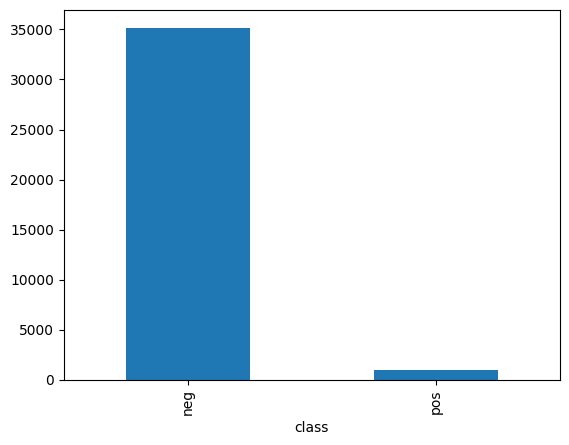

In [62]:
df_drop["class"].value_counts().plot(kind="bar")
print(df_drop["class"].value_counts())

In [65]:
numerical_features=df_drop.select_dtypes(exclude="object").columns

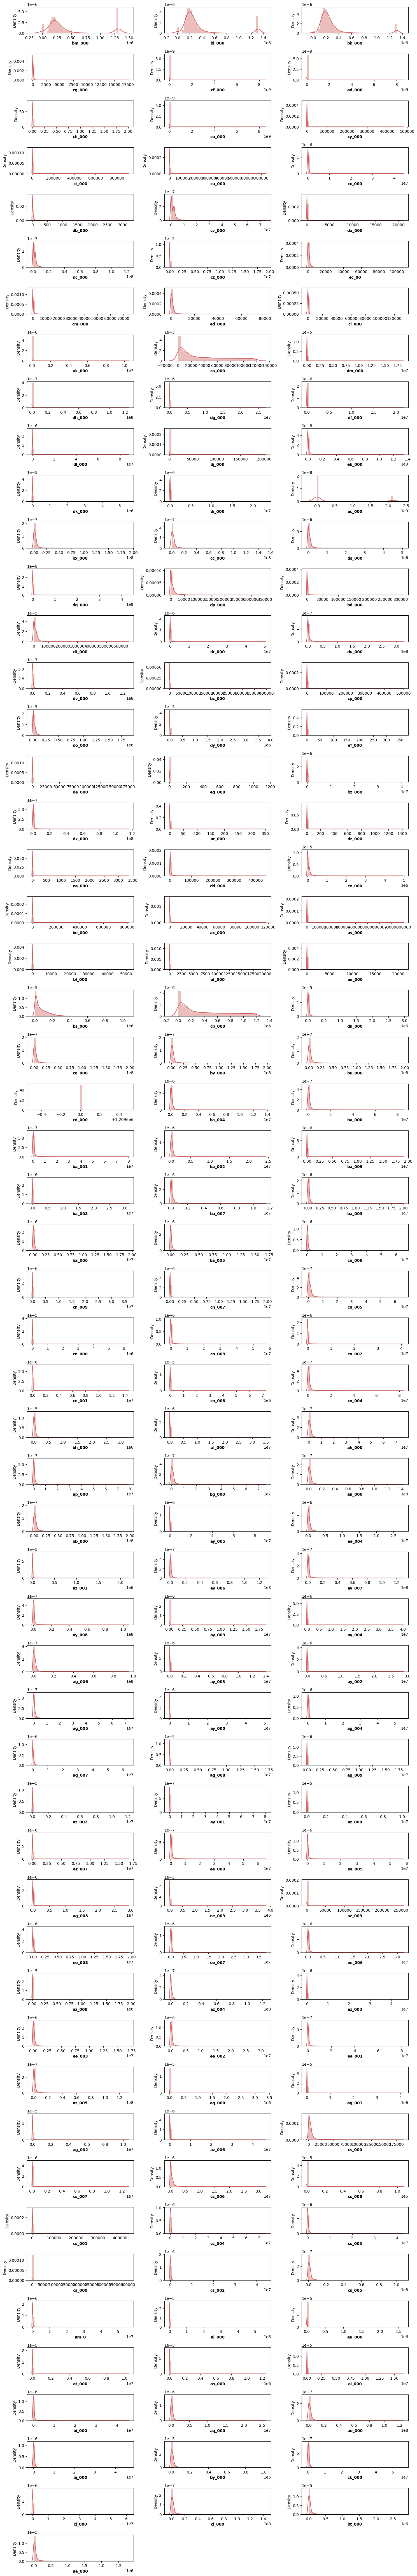

In [66]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numerical_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [68]:
# Model Evaluation

In [73]:
X=df_drop.drop("class",axis=1)
y=df_drop["class"]

In [77]:
y.replace({'pos':1,'neg':0}, inplace=True)

In [78]:
y

0        1
1        1
2        1
3        1
4        1
        ..
36183    0
36184    0
36185    0
36186    0
36187    0
Name: class, Length: 36188, dtype: int64

In [79]:
#  KNN Imputer for Null values

In [80]:
robust_scaler = RobustScaler()
X1= robust_scaler.fit_transform(X)

In [83]:
# Knn Imputer
results=[]
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies=[str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps =[('i',KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores=cross_val_score(pipeline,X1,y,scoring='accuracy',cv=2,n_jobs=-1)
    results.append(scores)
    print(f"n_neighbours: {s} || accuracy:{mean(scores)}")

n_neighbours: 1 || accuracy:0.6921078810655465
n_neighbours: 3 || accuracy:0.7727423455289046
n_neighbours: 5 || accuracy:0.6841770752735714
n_neighbours: 7 || accuracy:0.6392450536089311
n_neighbours: 9 || accuracy:0.6787609152205151


In [85]:
knn_pipeline= Pipeline(steps=[
    ('imputer',KNNImputer(n_neighbors=3,weights="uniform", metric="nan_euclidean")),
    ("robust_scaler",RobustScaler())
    ])

In [86]:
X_knn = knn_pipeline.fit_transform(X)

In [88]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [90]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [91]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [92]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [89]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [93]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9915
- F1 score: 0.9916
- Precision: 0.9882
- Recall: 0.9950
- Roc Auc Score: 0.9915
- COST: 18340.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9839
- F1 score: 0.9841
- Precision: 0.9794
- Recall: 0.9888
- Roc Auc Score: 0.9839
- COST: 40970.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9843
- F1 score: 0.9843
- Precision: 0.9809
- Recall: 0.9878
- Roc Auc Score: 0.9843
- COST: 176900.
----------------------------------
Model performance for Test set
- Accuracy: 0.9814
- F1 score: 0.9816
- Precision: 0.9790
- Recall: 0.9841
- Roc Auc

In [94]:
report_knn

,Model Name,Cost
5,XGBClassifier,4440
6,CatBoosting Classifier,10060
0,Random Forest,18340
1,Decision Tree,40970
4,K-Neighbors Classifier,46290
2,Gradient Boosting,57490
7,AdaBoost Classifier,113660
3,Logistic Regression,369810


In [95]:
# Experiment: 2 = Simple Imputer with Strategy Median

In [ ]:
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [97]:
X_median = median_pipeline.fit_transform(X)

In [98]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [99]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9913
- F1 score: 0.9914
- Precision: 0.9861
- Recall: 0.9967
- Roc Auc Score: 0.9912
- COST: 12490.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9864
- F1 score: 0.9866
- Precision: 0.9811
- Recall: 0.9921
- Roc Auc Score: 0.9863
- COST: 29350.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9840
- F1 score: 0.9840
- Precision: 0.9813
- Recall: 0.9867
- Roc Auc Score: 0.9840
- COST: 190760.
----------------------------------
Model performance for Test set
- Accuracy: 0.9810
- F1 score: 0.9812
- Precision: 0.9757
- Recall: 0.9868
- Roc Auc

In [100]:
report_median

,Model Name,Cost
5,XGBClassifier,6070
6,CatBoosting Classifier,6820
0,Random Forest,12490
1,Decision Tree,29350
2,Gradient Boosting,48240
4,K-Neighbors Classifier,54430
7,AdaBoost Classifier,89540
3,Logistic Regression,320160


In [101]:
# Experiment: 3 = MICE for Imputing Null values

In [106]:
import miceforest as mf
X_mice = X.copy()
kernel=mf.ImputationKernel(
 X_mice,
 save_all_iterations_data=True,
 random_state=42
)

In [107]:
X_mice = kernel.complete_data()

In [108]:
# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [109]:
# Fit X with Mice imputer 
X_mice= mice_pipeline.fit_transform(X_mice)

In [111]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [112]:
# Training the models
report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9902
- F1 score: 0.9902
- Precision: 0.9847
- Recall: 0.9957
- Roc Auc Score: 0.9902
- COST: 16080.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9843
- F1 score: 0.9843
- Precision: 0.9775
- Recall: 0.9913
- Roc Auc Score: 0.9843
- COST: 32090.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9853
- F1 score: 0.9854
- Precision: 0.9820
- Recall: 0.9888
- Roc Auc Score: 0.9853
- COST: 162090.
----------------------------------
Model performance for Test set
- Accuracy: 0.9807
- F1 score: 0.9807
- Precision: 0.9749
- Recall: 0.9865
- Roc Auc

In [113]:
report_mice

,Model Name,Cost
5,XGBClassifier,5070
6,CatBoosting Classifier,8560
0,Random Forest,16080
1,Decision Tree,32090
4,K-Neighbors Classifier,44210
2,Gradient Boosting,48770
7,AdaBoost Classifier,102740
3,Logistic Regression,169830


In [114]:
# Experiment: 4 = Simple Imputer with Strategy Constant

In [119]:
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [120]:
X_constant = constant_pipeline.fit_transform(X)

In [121]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)

In [122]:
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_constant, y)
report_constant = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9929
- F1 score: 0.9929
- Precision: 0.9887
- Recall: 0.9972
- Roc Auc Score: 0.9929
- COST: 10800.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9879
- F1 score: 0.9880
- Precision: 0.9824
- Recall: 0.9936
- Roc Auc Score: 0.9879
- COST: 23750.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9830
- F1 score: 0.9830
- Precision: 0.9803
- Recall: 0.9857
- Roc Auc Score: 0.9830
- COST: 205550.
----------------------------------
Model performance for Test set
- Accuracy: 0.9807
- F1 score: 0.9808
- Precision: 0.9771
- Recall: 0.9845
- Roc Auc

In [123]:
report_constant

,Model Name,Cost
5,XGBClassifier,2410
6,CatBoosting Classifier,4000
0,Random Forest,10800
1,Decision Tree,23750
4,K-Neighbors Classifier,43200
2,Gradient Boosting,56120
7,AdaBoost Classifier,92210
3,Logistic Regression,115570


In [124]:
# Experiment: 5 = Simple Imputer with Strategy Mean

In [125]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [126]:
X_mean = mean_pipeline.fit_transform(X)

In [127]:

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [128]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9942
- F1 score: 0.9941
- Precision: 0.9904
- Recall: 0.9978
- Roc Auc Score: 0.9942
- COST: 8170.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9865
- F1 score: 0.9864
- Precision: 0.9830
- Recall: 0.9899
- Roc Auc Score: 0.9866
- COST: 36190.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9856
- F1 score: 0.9857
- Precision: 0.9828
- Recall: 0.9886
- Roc Auc Score: 0.9856
- COST: 164880.
----------------------------------
Model performance for Test set
- Accuracy: 0.9864
- F1 score: 0.9863
- Precision: 0.9834
- Recall: 0.9892
- Roc Auc 

In [129]:
report_mean

,Model Name,Cost
5,XGBClassifier,2380
6,CatBoosting Classifier,7450
0,Random Forest,8170
1,Decision Tree,36190
2,Gradient Boosting,38660
4,K-Neighbors Classifier,44770
7,AdaBoost Classifier,91120
3,Logistic Regression,306180


In [130]:
# Experiment: 5 = Principle component analysis with imputing median

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [133]:
X_pca = pca_pipeline.fit_transform(X)

In [134]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,150):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<Axes: >

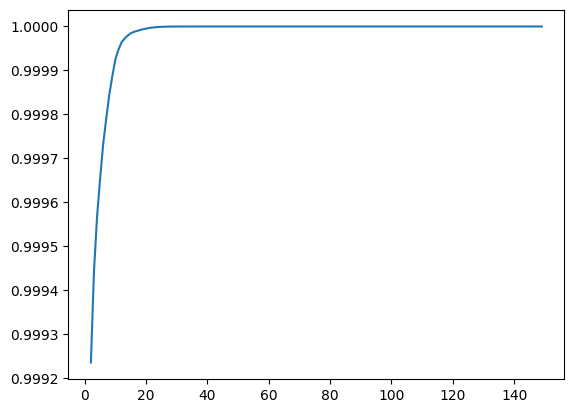

In [135]:

# plotting variance ratio
pd.Series(var_ratio).plot()

<Figure size 500x500 with 0 Axes>

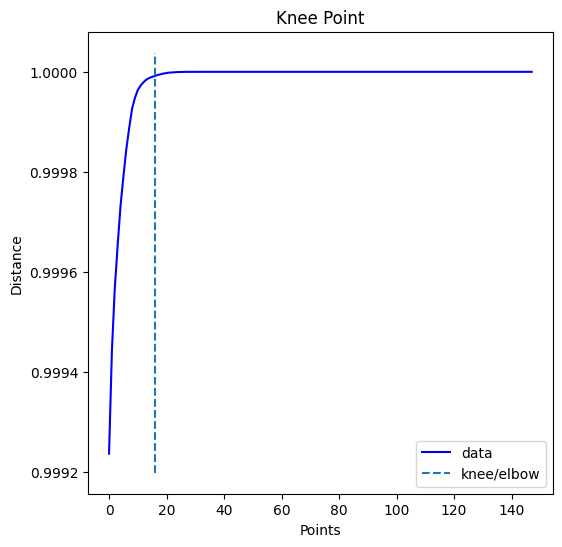

Knee Locator k = 18


In [137]:
# Kneed algorithm to find the elbow point
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [138]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=18,random_state=42).fit(X_res)

reduced=pca_final.fit_transform(X_pca)

In [139]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [140]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 1.0000
- Recall: 0.9972
- Roc Auc Score: 0.9986
- COST: 39000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9821
- F1 score: 0.9823
- Precision: 0.9781
- Recall: 0.9867
- Roc Auc Score: 0.9821
- COST: 48560.


Decision Tree
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 1.0000
- Recall: 0.9972
- Roc Auc Score: 0.9986
- COST: 39000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9730
- F1 score: 0.9732
- Precision: 0.9716
- Recall: 0.9749
- Roc Auc Score: 0.9729
- COST: 90510.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9395
- F1 score: 0.9390
- Precision: 0.9438
- Recall: 0.9343
- Roc Auc Score: 0.9394
- COST: 932520.
----------------------------------
Model performance for Test set
- Accuracy: 0.9401
- F1 score: 0.9403
- Precision: 0.9443
- Recall: 0.9363
-

In [141]:
report_pca

,Model Name,Cost
0,Random Forest,48560
5,XGBClassifier,61940
6,CatBoosting Classifier,73740
1,Decision Tree,90510
4,K-Neighbors Classifier,96080
2,Gradient Boosting,228390
7,AdaBoost Classifier,299910
3,Logistic Regression,672720


In [147]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row([report_constant.loc[report_constant["Cost"].idxmin(), "Model Name"],"Simple Imputer-Constant",report_constant["Cost"].min()])
pt.add_row([report_mice.loc[report_mice["Cost"].idxmin(), "Model Name"],"Mice",report_mice["Cost"].min()])
pt.add_row([report_knn.loc[report_knn["Cost"].idxmin(), "Model Name"],"Knn-Imputer",report_knn["Cost"].min()])
pt.add_row([report_mean.loc[report_mean["Cost"].idxmin(), "Model Name"],"Simple Imputer-Mean",report_mean["Cost"].min()])
pt.add_row([report_median.loc[report_median["Cost"].idxmin(), "Model Name"],"Median",report_median["Cost"].min()])
pt.add_row([report_pca.loc[report_pca["Cost"].idxmin(), "Model Name"],"PCA",report_pca["Cost"].min()])
print(pt)

+---------------+-------------------------+------------+
|     Model     |    Imputation_method    | Total_cost |
+---------------+-------------------------+------------+
| XGBClassifier | Simple Imputer-Constant |    2410    |
| XGBClassifier |           Mice          |    5070    |
| XGBClassifier |       Knn-Imputer       |    4440    |
| XGBClassifier |   Simple Imputer-Mean   |    2380    |
| XGBClassifier |          Median         |    6070    |
| Random Forest |           PCA           |   48560    |
+---------------+-------------------------+------------+


In [149]:
# Fitting the final model
final_model = XGBClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_constant, y)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [151]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 1.0
Final XGBoost Classifier Accuracy Score (Test) : 0.9967916726080137


In [152]:
print("Final XGBoost Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final XGBoost Classifier Cost Metric(Test) : 2410


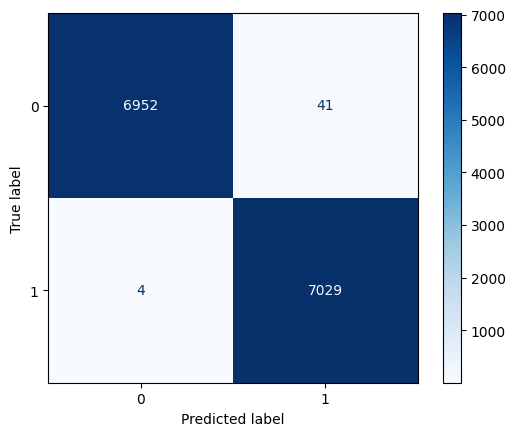

In [158]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, final_model.predict(X_test))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d');


In [159]:
# The best Model is XGBoost Classifier with 99.6% accuracy and cost of 2410